In [283]:
# importing required libraries
import pandas as pd
import emoji
import seaborn as sns
import matplotlib.pyplot as plt

In [235]:
# Loading Dataset
data = pd.read_pickle('email_campaigns.pkl')

In [237]:
# Structuring above loaded dataset and saving in dataframe
email_data = pd.DataFrame()
for i in range(len(data)):
    for key in data[i].keys():
        for j in range(len(data[i][key])):
            try:
                temp_df = pd.DataFrame()
                temp_df['domain'] = [key]
                temp_df['subject'] = [data[i][key][j]['subject']]
                temp_df['body'] = [data[i][key][j]['body']]
                temp_df['opened'] = [data[i][key][j]['opened']]
                try:
                    temp_df['meeting_link_clicked'] = [data[i][key][j]['meeting link clicked']]
                except:
                    temp_df['meeting_link_clicked'] = [data[i][key][j]['meeting_link_clicked']]
                temp_df['responded'] = [data[i][key][j]['responded']]
                email_data = pd.concat([email_data, temp_df])
            except:
                pass

In [240]:
# transforming subject and body col. into numerical by taking lenght of characters in the text
email_data['subject_len'] = email_data['subject'].apply(lambda x: len(x))
email_data['body_len'] = email_data['body'].apply(lambda x: len(x))
# Counting the number of emojis in subject and body col.
email_data['emoji_count'] = email_data['body'].apply(lambda x: sum([1 if emoji.is_emoji(i) else 0 for i in x]))+email_data['subject'].apply(lambda x: sum([1 if emoji.is_emoji(i) else 0 for i in x]))

In [279]:
# filtering required col. only
data_viz = email_data[['subject_len', 'body_len', 'emoji_count', 'opened', 'meeting_link_clicked']]

Shape of your Data Set loaded: (154, 5)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    4 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
Since Number of Rows in data 154 exceeds maximum, randomly sampling 154 rows for EDA...

################ Binary_Classification problem #####################
To fix data quality issues automatically, import FixDQ from autoviz...


,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
subject_len,int64,0.000000,28,26,75,has 1 outliers greater than upper bound (74.50) or lower than lower bound(22.50). Cap them or remove them.
body_len,int64,0.000000,74,208,625,has 3 outliers greater than upper bound (543.25) or lower than lower bound(167.25). Cap them or remove them.
emoji_count,int64,0.000000,3,0,4,has 9 outliers greater than upper bound (2.50) or lower than lower bound(-1.50). Cap them or remove them.
opened,int64,0.000000,1,0,1,No issue
meeting_link_clicked,int64,0.000000,1,0,1,No issue


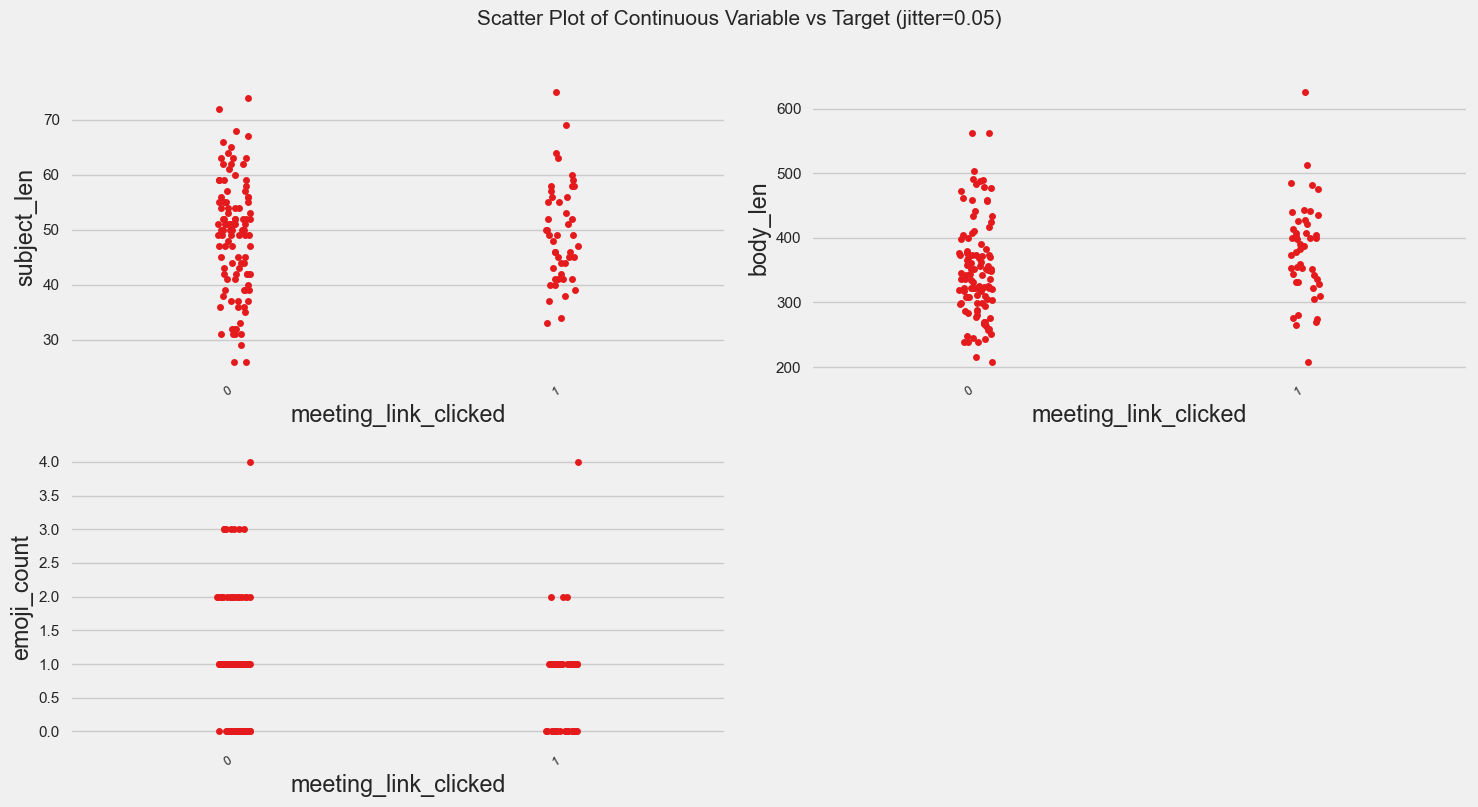

Total Number of Scatter Plots = 6


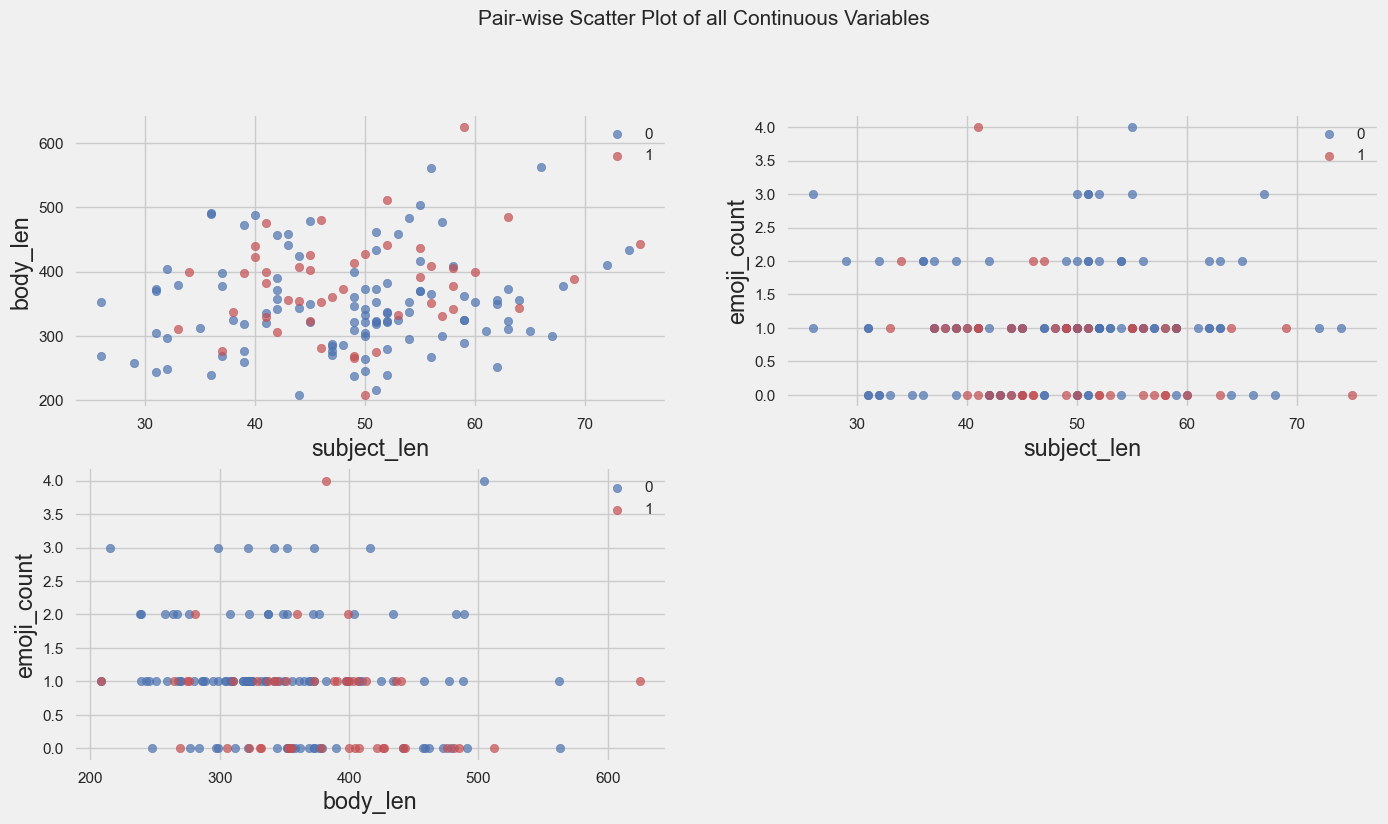

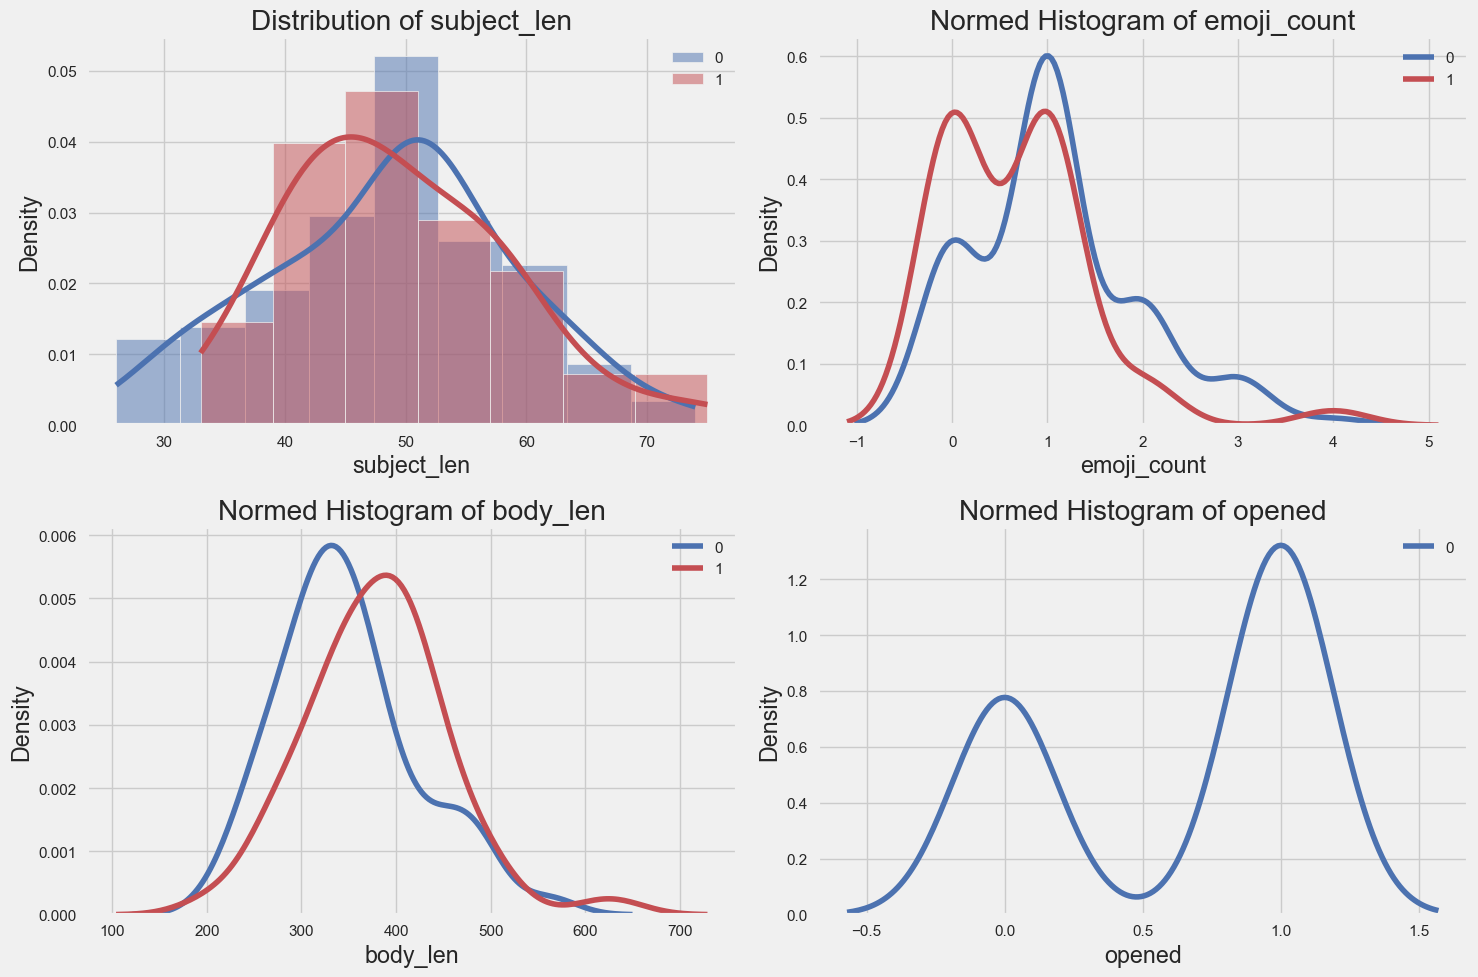

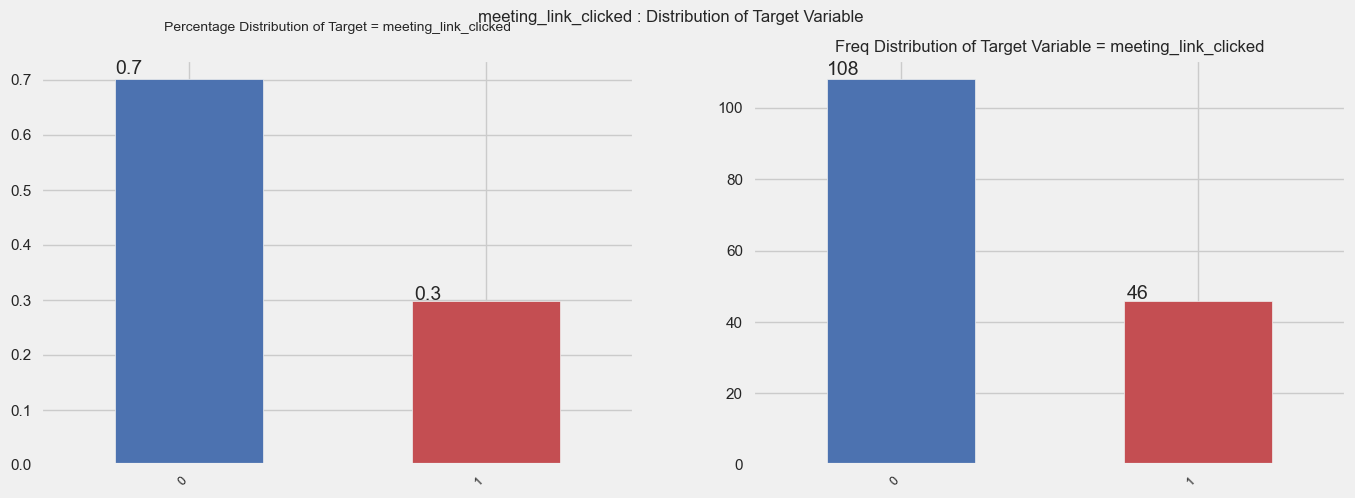

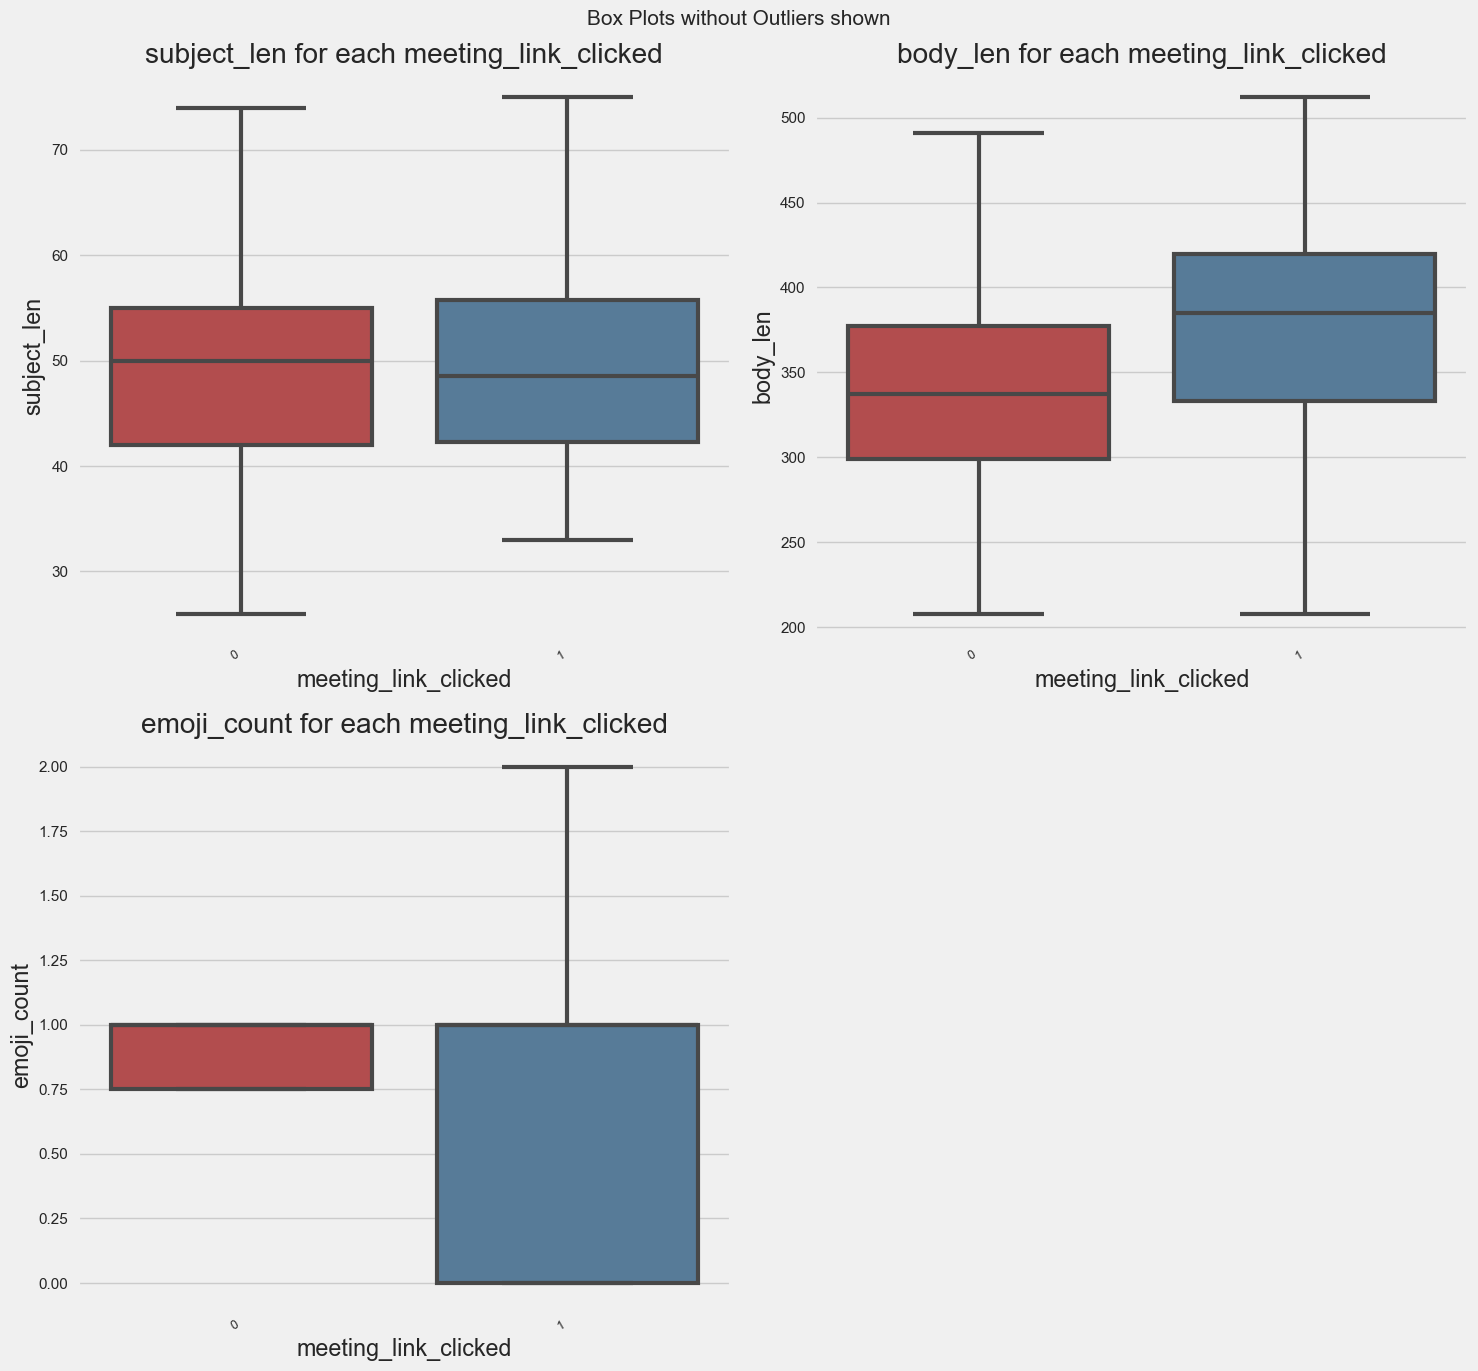

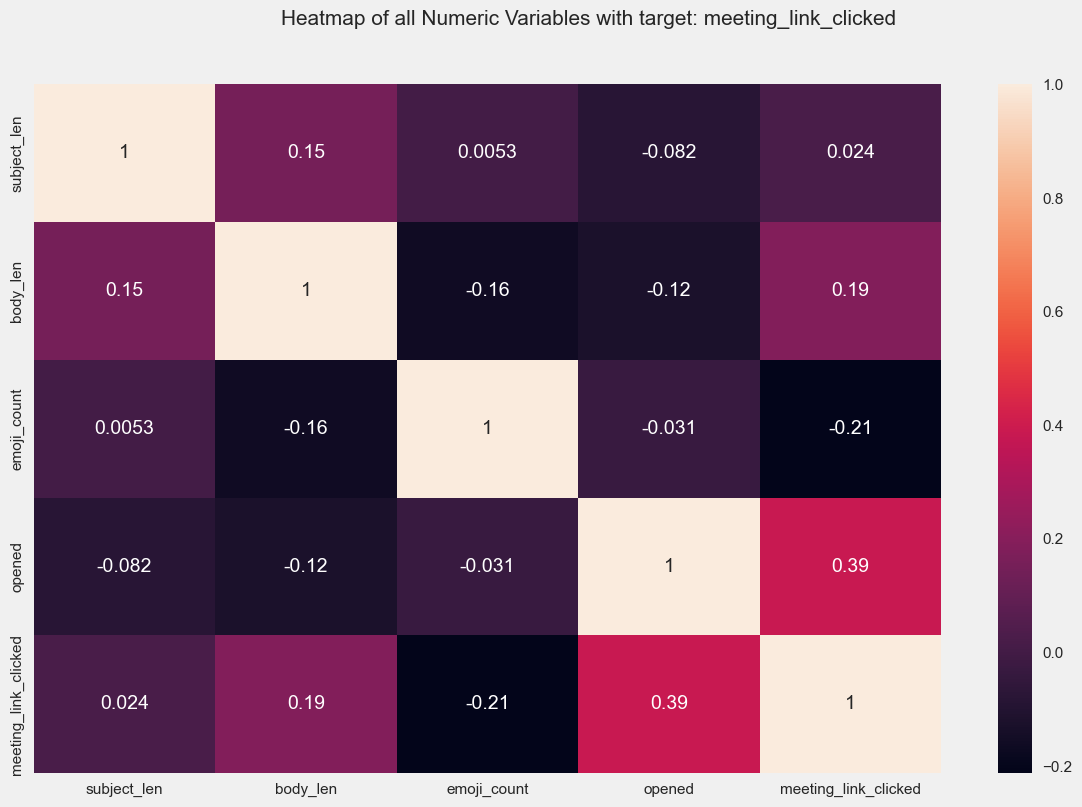

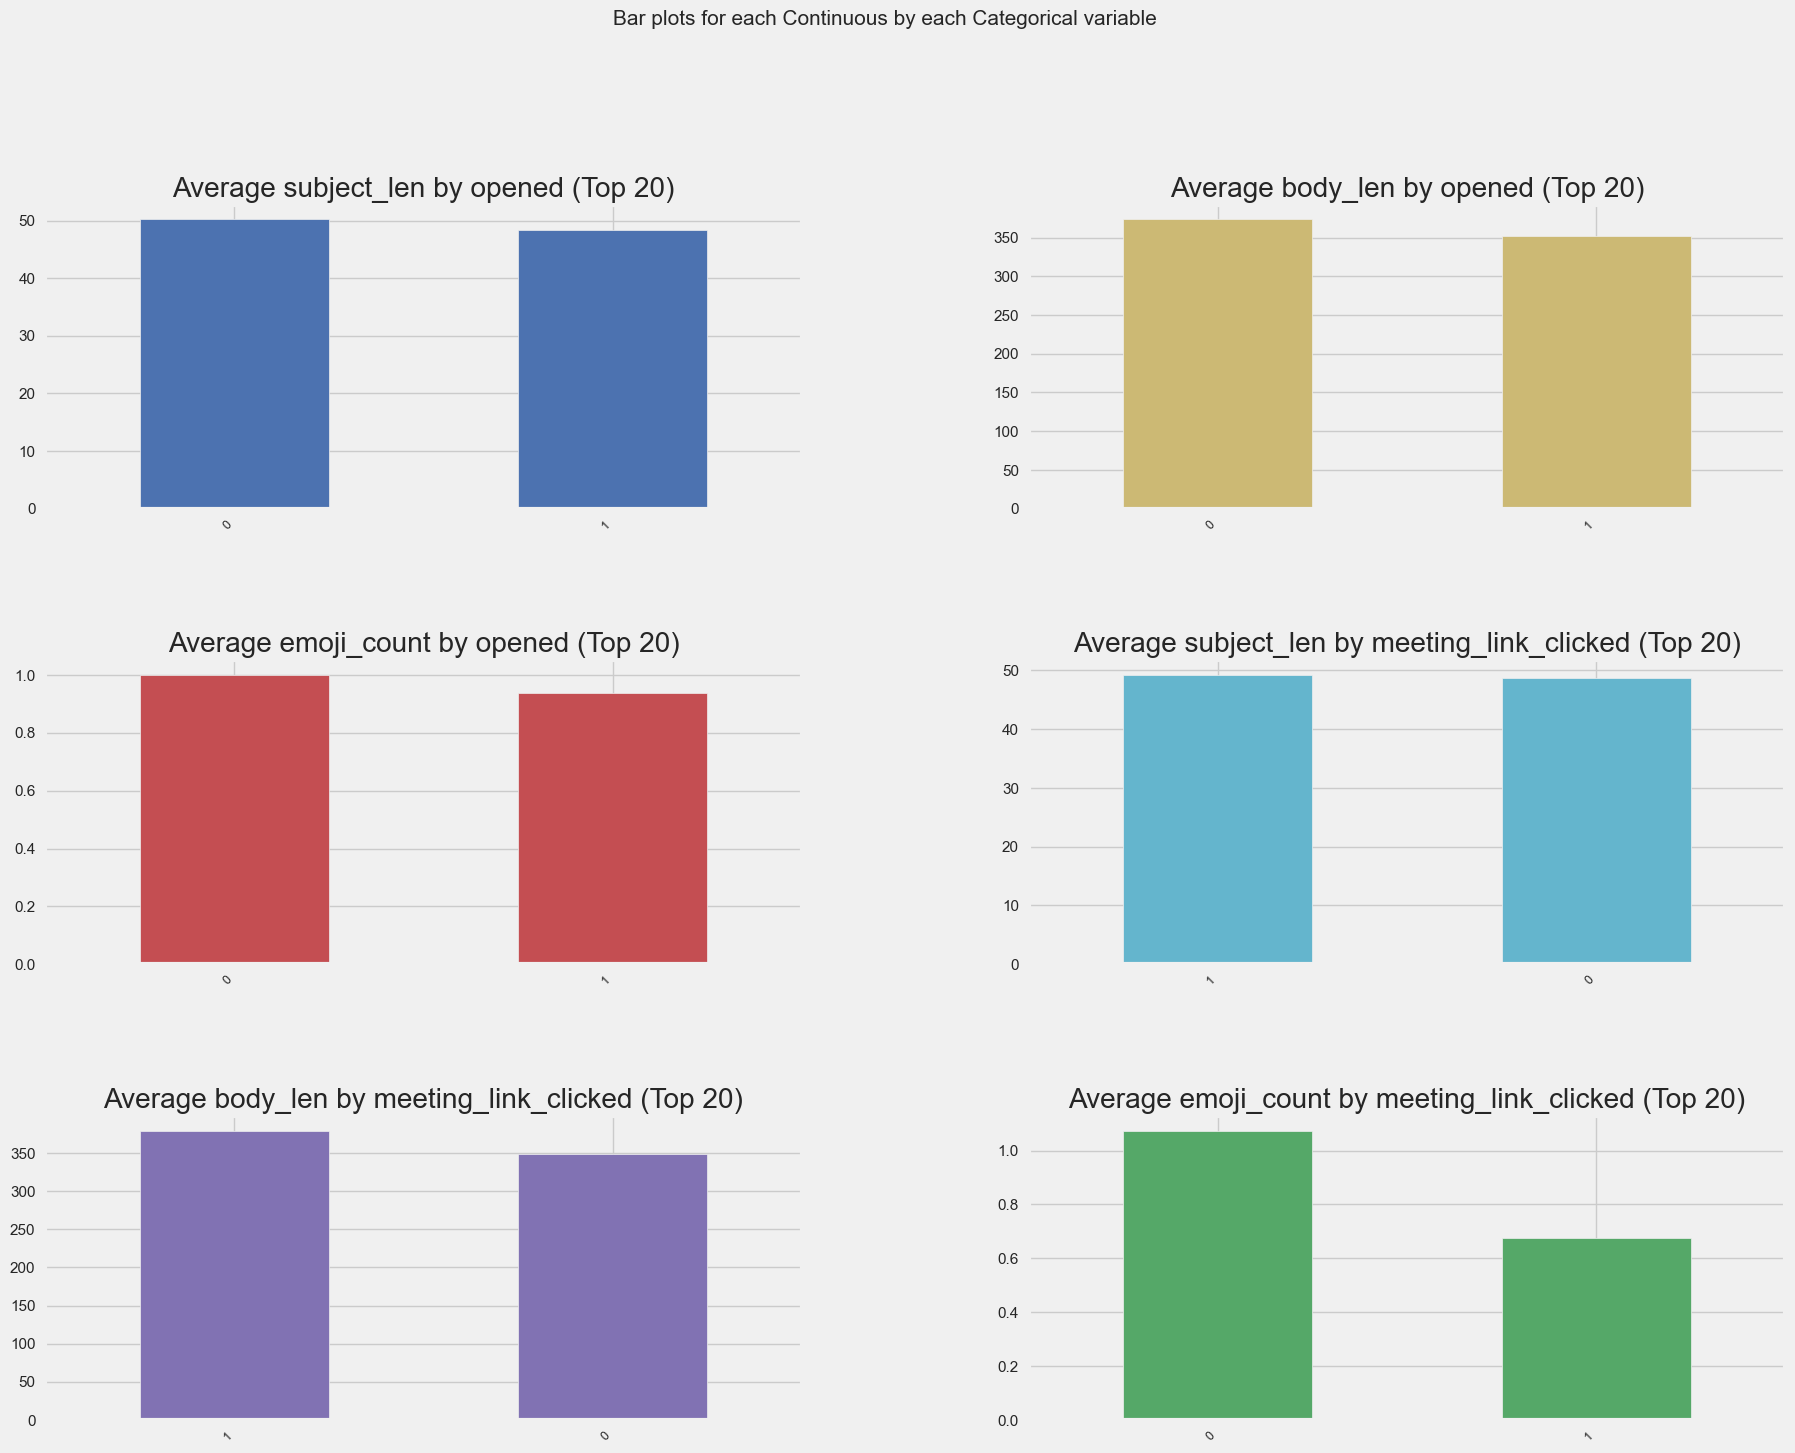

All Plots done
Time to run AutoViz = 7 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


,subject_len,body_len,emoji_count,opened,meeting_link_clicked
0,49,238,2,1,0
0,51,215,3,1,0
0,47,270,1,1,0
0,40,422,0,1,1
0,57,477,1,0,0
0,59,625,1,1,1
0,32,297,0,1,0
0,54,352,0,1,0
0,41,399,1,1,1
0,46,281,2,1,1


In [282]:
## exploring Data Analysis by using Autoviz library, it will vizualize the dataset autoatically for us
# !pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline
AV = AutoViz_Class()
AV.AutoViz(filename='', dfte=data_viz, depVar='meeting_link_clicked', verbose=1, max_rows_analyzed=data_viz.shape[0])

In [ ]:
# splitting dataset into input and target variable

In [248]:
X = email_data[['subject_len', 'body_len', 'emoji_count', 'opened']]
y = email_data['meeting_link_clicked']

In [251]:
from sklearn.model_selection import train_test_split

In [266]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

In [260]:
# loading LR model to predict the metting_link_clicks wheater clicked or not
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [261]:
# traing LR ,odel
lr.fit(xtrain, ytrain)

LogisticRegression()

In [288]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

In [287]:
accuracy_score(ytest, lr.predict(xtest))

0.7872340425531915

In [ ]:
# Accuracy score is 78%

In [290]:
precision_score(ytest, lr.predict(xtest))

0.8888888888888888

In [291]:
recall_score(ytest, lr.predict(xtest))

0.47058823529411764

In [292]:
f1_score(ytest, lr.predict(xtest))

0.6153846153846153

In [284]:
print(classification_report(ytest, lr.predict(xtest)))

              precision    recall  f1-score   support

           0       0.76      0.97      0.85        30
           1       0.89      0.47      0.62        17

    accuracy                           0.79        47
   macro avg       0.83      0.72      0.73        47
weighted avg       0.81      0.79      0.77        47

